In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
min_latitude = 42.2279
max_latitude = 42.4061
min_longitude = -71.1912
max_longitude = -70.9865

def generate_data(number_of_points):
    np.random.seed(16)
    latitudes = np.round(np.random.uniform(min_latitude, max_latitude, number_of_points), 6)
    longitudes = np.round(np.random.uniform(min_longitude, max_longitude, number_of_points), 6)
    data = np.column_stack((latitudes, longitudes))
    return data

In [3]:
number_of_points = 60
coordinate_data = generate_data(number_of_points)
#coordinate_data

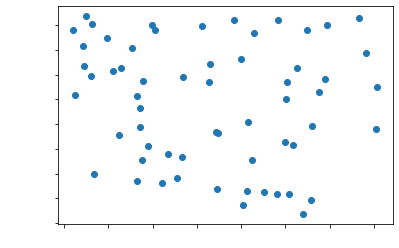

In [4]:
class UserData:
    def __init__(self, node, latitude, longitude) -> None:
        self.id = node
        self.latitude = latitude
        self.longitude = longitude

count = 0
data = []
for coordinate in coordinate_data:
    count += 1
    data.append(UserData(count, coordinate[0], coordinate[1]))

x = [elem.latitude for elem in data]
y = [elem.longitude for elem in data]
plt.xticks(color='white')
plt.yticks(color='white')
plt.scatter(x, y)

In [5]:
def build_connected_graph(data):
    num_points = len(data)
    graph = {(elem.latitude, elem.longitude): [] for elem in data}

    for i in range(num_points):
        for j in range(i + 1, num_points):
            weight = math.dist([data[i].latitude, data[j].longitude],[data[j].latitude, data[i].longitude])
            key_i = (data[i].latitude, data[i].longitude)
            key_j = (data[j].latitude, data[j].longitude)
            graph[key_i].append((key_j, weight))
            graph[key_j].append((key_i, weight))

    return graph

graph = build_connected_graph(data)

In [6]:
def find(parent, node):
    if parent[node] != node:
        parent[node] = find(parent, parent[node])
    return parent[node]

def union(parent, rank, node1, node2):
    root1 = find(parent, node1)
    root2 = find(parent, node2)

    if rank[root1] < rank[root2]:
        parent[root1] = root2
    elif rank[root1] > rank[root2]:
        parent[root2] = root1
    else:
        parent[root2] = root1
        rank[root1] += 1
def build_mst(graph):
    edges = []
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            edges.append((weight, node, neighbor))

    edges.sort()
    mst = []
    parent = {node: node for node in graph}
    rank = {node: 0 for node in graph}

    for weight, node1, node2 in edges:
        if find(parent, node1) != find(parent, node2):
            mst.append((node1, node2, weight))
            union(parent, rank, node1, node2)

    return mst

minimum_spanning_tree = build_mst(graph)

In [7]:
# determine clusters
def dfs_recursive(graph, node, visited, nodes):
    if node not in visited:
        nodes.append(node)
        visited.add(node)
        for neighbor in graph[node]:
            dfs_recursive(graph, neighbor, visited, nodes)

def dfs(graph):
    clusters = {}
    count = 0
    visited = set()
    for node in graph:
        if node not in visited:
            nodes = []
            dfs_recursive(graph, node, visited, nodes)
            count += 1
            clusters[count] = nodes
    return clusters


In [8]:
# Cluster by removing k - 1 most expensive edges from the MST
def kcluster(minimum_spanning_tree, k):
    # Sort the MST edges based on weights
    minimum_spanning_tree.sort(key=lambda x: x[2], reverse=True)

    node_cluster = {node: set() for node in graph.keys()}
    for u, v, weight in minimum_spanning_tree:
        node_cluster[u].add(v)
        node_cluster[v].add(u)

    clustered_nodes = {}
    for i in range(k - 1):
        node1, node2, weight = minimum_spanning_tree.pop(0)
        node_cluster[node1].remove(node2)
        node_cluster[node2].remove(node1)
    clustered_nodes = dfs(node_cluster)

    return clustered_nodes

In [9]:
def isToDeleteEdge(clustered_nodes):
    for value in clustered_nodes.values():
        if len(value) < 10:
            return False
    return True

# Cluster by removing edges that result in relatively equal number of nodes in each cluster
def cluster(minimum_spanning_tree, k):
    minimum_spanning_tree.sort(key=lambda x: x[2], reverse=True)
    print(minimum_spanning_tree)
    print(len(minimum_spanning_tree))
    node_cluster = {node: set() for node in graph.keys()}
    for u, v, weight in minimum_spanning_tree:
        node_cluster[u].add(v)
        node_cluster[v].add(u)

    clustered_nodes = {}
    edge = 0
    while edge < len(minimum_spanning_tree):
        node1, node2, weight = minimum_spanning_tree[edge]
        node_cluster[node1].remove(node2)
        node_cluster[node2].remove(node1)
        clustered_nodes = dfs(node_cluster)
        if isToDeleteEdge(clustered_nodes):
            minimum_spanning_tree.pop(edge)
        else:
            # retain the edge, move to the next one
            edge += 1
            node_cluster[node1].add(node2)
            node_cluster[node2].add(node1)
            continue
        if len(clustered_nodes) == k:
            break
    clustered_nodes = dfs(node_cluster)
    return clustered_nodes

In [10]:
clustered_nodes = cluster(minimum_spanning_tree, 6)
minimum_spanning_tree = build_mst(graph)
k_clustered_nodes = kcluster(minimum_spanning_tree, 6)


[((42.365345, -71.101745), (42.401119, -71.104698), 0.03589567223218256), ((42.372249, -71.054011), (42.395588, -71.028399), 0.0346508797146694), ((42.328348, -71.168101), (42.330901, -71.136517), 0.031687014138282094), ((42.372249, -71.054011), (42.401975, -71.063022), 0.031061764228714334), ((42.350631, -71.075138), (42.365345, -71.101745), 0.03040451027396853), ((42.328841, -71.097946), (42.349971, -71.118186), 0.02925977614405179), ((42.27628, -71.005351), (42.302762, -71.000762), 0.026876667297121643), ((42.330901, -71.136517), (42.349971, -71.118186), 0.026451662726567817), ((42.241798, -71.150431), (42.266289, -71.15788), 0.025598763290440522), ((42.288608, -71.154402), (42.311297, -71.166066), 0.02551155849805922), ((42.269281, -71.057008), (42.292182, -71.052891), 0.023268121754878045), ((42.349971, -71.118186), (42.365345, -71.101745), 0.022509250476194297), ((42.263298, -71.022931), (42.27628, -71.005351), 0.02185380342182701), ((42.231179, -71.070794), (42.240432, -71.05147

In [11]:
import networkx as nx

def display_graph(nodes, weighted_edges):
    plt.figure(figsize=(20, 8))
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, font_size=10, font_weight='bold', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.show()

54


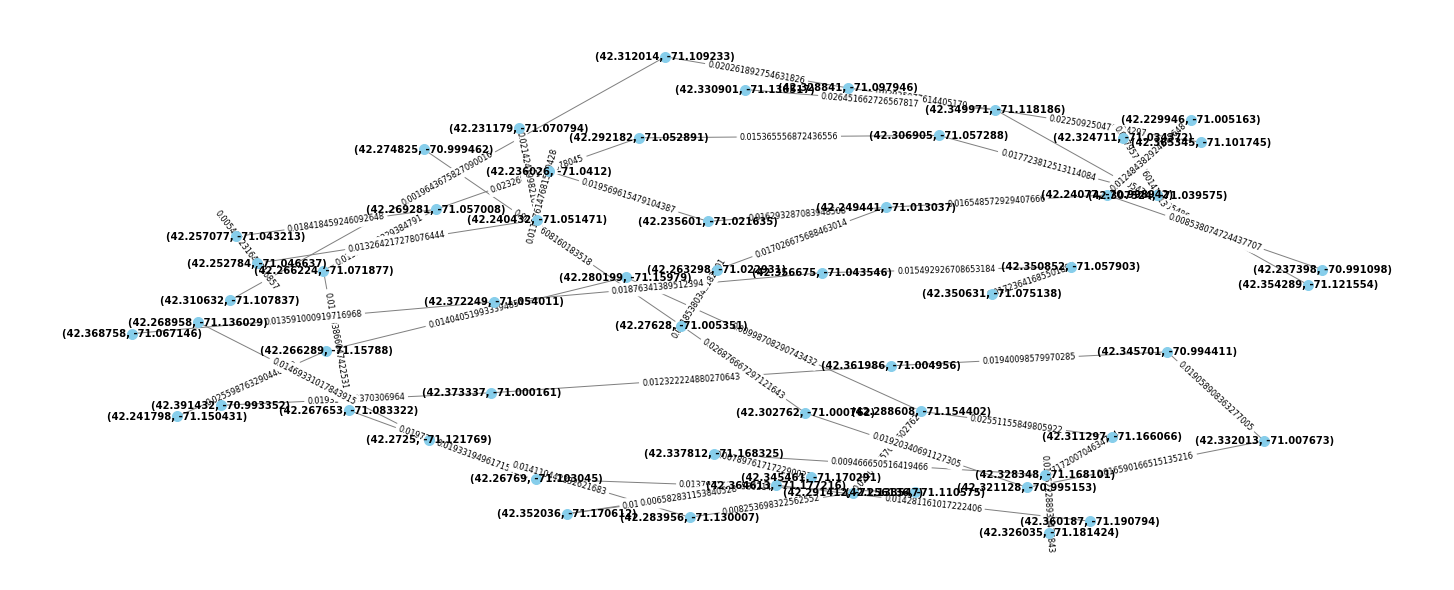

In [12]:
# display the MST
print(len(minimum_spanning_tree))
nodes = [node for (node, _, _) in minimum_spanning_tree]
display_graph(nodes, minimum_spanning_tree)

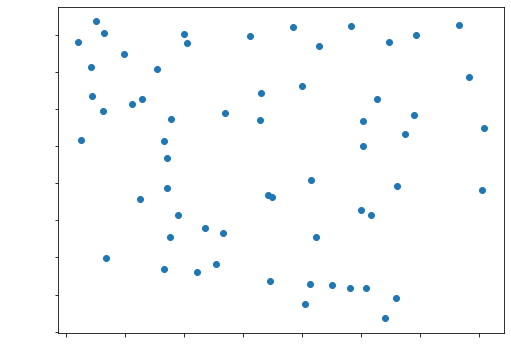

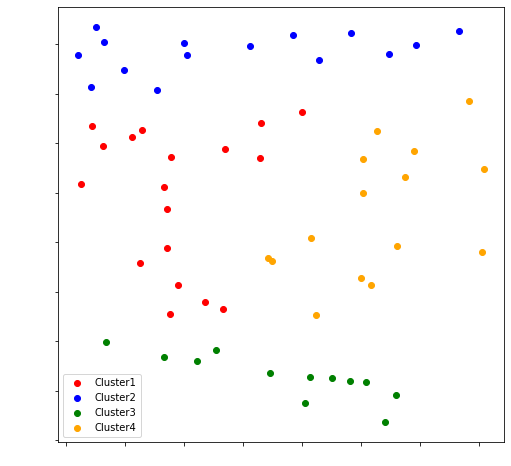

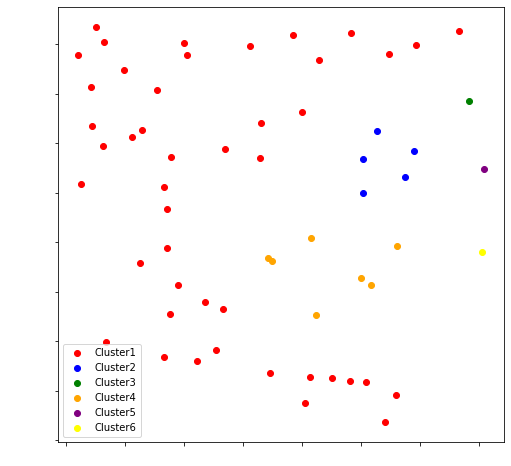

In [13]:
# data plot 
x = [elem.latitude for elem in data]
y = [elem.longitude for elem in data]
plt.figure(figsize=(8, 6))
plt.xticks(color='white')
plt.yticks(color='white')
plt.scatter(x, y)

# clustered plot
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
for (key, value) in clustered_nodes.items():
    x = [elem[0] for elem in value]
    y = [elem[1] for elem in value]
    ax.scatter(x, y, c=colors[key - 1], label=f'Cluster{key}')
    labels = [f'{elem[0], elem[1]}' for elem in value]
ax.legend()
plt.xticks(color='white')
plt.yticks(color='white')

# clustered plot
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
for (key, value) in k_clustered_nodes.items():
    x = [elem[0] for elem in value]
    y = [elem[1] for elem in value]
    ax.scatter(x, y, c=colors[key - 1], label=f'Cluster{key}')
    labels = [f'{elem[0], elem[1]}' for elem in value]
ax.legend()


plt.xticks(color='white')
plt.yticks(color='white')
plt.show()